In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
import seaborn as sns

In [2]:
ticket = yf.Ticker('^BVSP')
df_ticket = ticket.history(interval='1d', start='2018-01-01', end='2022-01-01')

In [3]:
df = df_ticket.copy()

In [4]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-23,105251.0,105453.0,104637.0,104891.0,7283600,0,0
2021-12-27,104892.0,105694.0,104798.0,105531.0,7594900,0,0
2021-12-28,105555.0,105652.0,104503.0,104864.0,7509000,0,0
2021-12-29,104863.0,105190.0,103851.0,104107.0,6590000,0,0
2021-12-30,104106.0,105269.0,104106.0,104822.0,11138100,0,0


In [5]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 988 entries, 2018-01-02 to 2021-12-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   988 non-null    float64
dtypes: float64(1)
memory usage: 15.4 KB


In [6]:
df[['Close']].tail()

,Close
Date,
2021-12-23,104891.0
2021-12-27,105531.0
2021-12-28,104864.0
2021-12-29,104107.0
2021-12-30,104822.0


In [7]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

<AxesSubplot:xlabel='Date'>

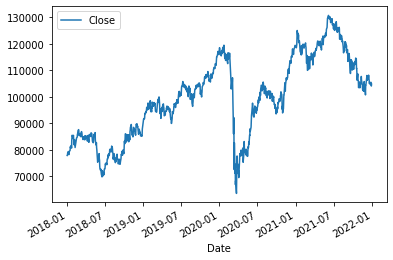

In [8]:
df[['Close']].plot()

In [9]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02     77891.0
2018-01-03     77995.0
2018-01-04     78647.0
2018-01-05     79071.0
2018-01-08     79379.0
                ...   
2021-12-23    104891.0
2021-12-27    105531.0
2021-12-28    104864.0
2021-12-29    104107.0
2021-12-30    104822.0
Length: 988, dtype: float64

In [10]:
decomposicao.trend.iloc[0:5]

Date
2018-01-02    80582.442675
2018-01-03    80704.429227
2018-01-04    80826.415780
2018-01-05    80948.402332
2018-01-08    81070.388884
Name: trend, dtype: float64

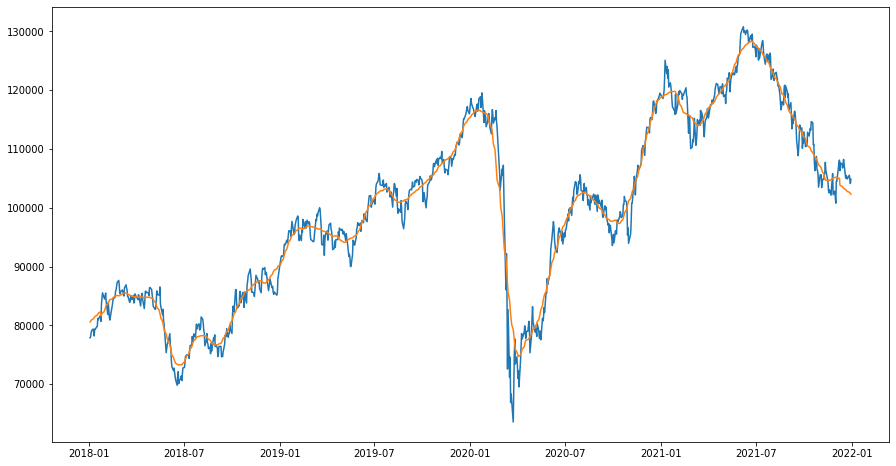

In [11]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

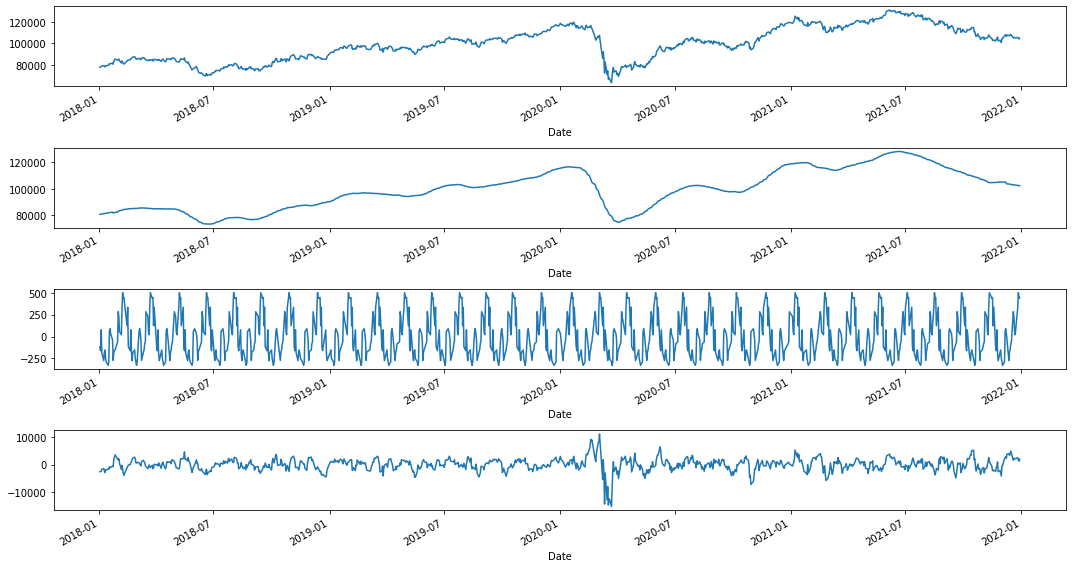

In [12]:
fix, (ax1, ax2, ax3, ax4) = plt.subplots(4,1,figsize=(15,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

In [13]:
media_model7d = df['Close'].rolling(7).mean()
media_model14d = df['Close'].rolling(14).mean()
media_model21d = df['Close'].rolling(21).mean()

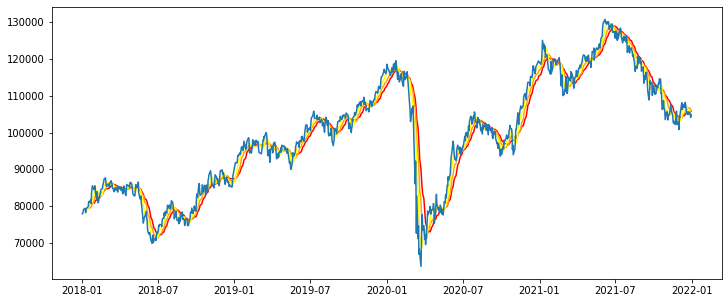

In [14]:
fig, ax = plt.subplots(figsize=(12,5))
plt.plot(media_model21d, 'red')
plt.plot(media_model14d, 'orange')
plt.plot(media_model7d, 'yellow')
plt.plot(df['Close'])

In [15]:
df.reset_index(inplace=True)

In [16]:
def features_extraction(df_):
    df_['year'] = df_['Date'].dt.year
    df_['month'] = df_['Date'].dt.month
    df_['day'] = df_['Date'].dt.day
    df_['rentabilidade'] = df_['Close'] / df_['Close'].shift() * 100 - 100

In [17]:
features_extraction(df)

In [18]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,rentabilidade
0,2018-01-02,76403.0,77909.0,76403.0,77891.0,2880300,0,0,2018,1,2,NaN
1,2018-01-03,77889.0,78414.0,77602.0,77995.0,3142200,0,0,2018,1,3,0.133520
2,2018-01-04,77998.0,79135.0,77998.0,78647.0,3486100,0,0,2018,1,4,0.835951
3,2018-01-05,78644.0,79071.0,78218.0,79071.0,2747100,0,0,2018,1,5,0.539118
4,2018-01-08,79070.0,79395.0,78631.0,79379.0,2550800,0,0,2018,1,8,0.389523


<AxesSubplot:xlabel='month'>

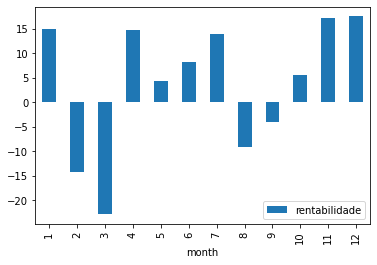

In [19]:
df.groupby('month').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [20]:
df.set_index('Date', inplace=True)

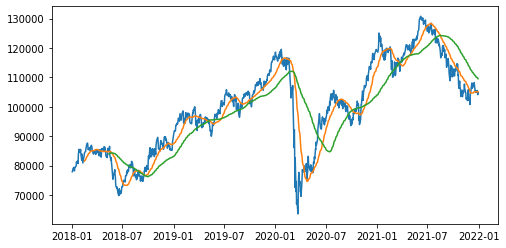

In [24]:
media_movel30d = df['Close'].rolling(30).mean()
media_model90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)
plt.plot(media_model90d)

<AxesSubplot:xlabel='day'>

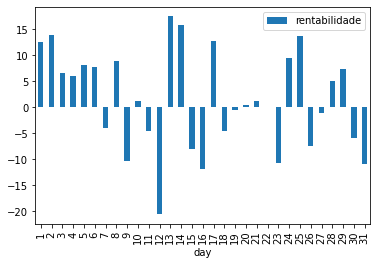

In [26]:
df.groupby('day').agg({'rentabilidade':'sum'}).plot(kind='bar')

In [27]:
df.iloc[0]

Open               76403.0
High               77909.0
Low                76403.0
Close              77891.0
Volume           2880300.0
Dividends              0.0
Stock Splits           0.0
year                2018.0
month                  1.0
day                    2.0
rentabilidade          NaN
Name: 2018-01-02 00:00:00, dtype: float64

In [28]:
df.iloc[-1]

Open             1.041060e+05
High             1.052690e+05
Low              1.041060e+05
Close            1.048220e+05
Volume           1.113810e+07
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.021000e+03
month            1.200000e+01
day              3.000000e+01
rentabilidade    6.867934e-01
Name: 2021-12-30 00:00:00, dtype: float64

In [29]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 -100

34.57523975812353

In [4]:
#tickets = ['KNRI11.SA','BPFF11.SA','HGLG11.SA','IFIX.SA','^BVSP','USDBRL=X']
tickets = ['ALZR11.SA','BCRI11.SA','BNFS11.SA','BBPO11.SA','BBRC11.SA','RDPD11.SA','RNDP11.SA','BCIA11.SA','BREV11.SA','BZLI11.SA','CARE11.SA','BRCO11.SA','BTLG11.SA','CRFF11.SA','CXRI11.SA','CPFF11.SA','CBOP11.SA','HGFF11.SA','HGLG11.SA','HGPO11.SA','HGRE11.SA','HGCR11.SA','HGRU11.SA','KINP11.SA','VRTA11.SA','BTCR11.SA','BPRP11.SA','BRCR11.SA','FEXC11.SA','BCFF11.SA','FCFL11.SA','CNES11.SA','CEOC11.SA','EDGA11.SA','FLRP11.SA','HCRI11.SA','NSLU11.SA','HTMX11.SA','MAXR11.SA','NVHO11.SA','PQDP11.SA','RBRM11.SA','RBRR11.SA','RECR11.SA','RECT11.SA','JRDM11.SA','TBOF11.SA','ALMI11.SA','VLOL11.SA','OUFF11.SA','VVPR11.SA','LVBI11.SA','BARI11.SA','BPFF11.SA','BPML11.SA','CXTL11.SA','CTXT11.SA','FLMA11.SA','EURO11.SA','ABCP11.SA','GTWR11.SA','HUSC11.SA','FIIB11.SA','FMOF11.SA','MBRF11.SA','MGFF11.SA','NPAR11.SA','PABY11.SA','FPNG11.SA','FPAB11.SA','RBRY11.SA','RBRP11.SA','RCRB11.SA','RBED11.SA','RBVA11.SA','RNGO11.SA','FISC11.SA','SCPF11.SA','SDIL11.SA','SHPH11.SA','ONEF11.SA','VERE11.SA','FVPQ11.SA','FIVN11.SA','VTLT11.SA','VSHO11.SA','IBFF11.SA','PLCR11.SA','CVBI11.SA','MCCI11.SA','ARRI11.SA','HOSI11.SA','RFOF11.SA','IRDM11.SA','KFOF11.SA','GSFI11.SA','FIGS11.SA','GGRC11.SA','RCFA11.SA','HABT11.SA','HCTR11.SA','HGBS11.SA','HLOG11.SA','HRDF11.SA','HPDP11.SA','HFOF11.SA','HSML11.SA','BICR11.SA','JPPA11.SA','JPPC11.SA','JSRE11.SA','KNHY11.SA','KNRE11.SA','KNIP11.SA','KNRI11.SA','KNCR11.SA','LGCP11.SA','LUGG11.SA','MALL11.SA','MXRF11.SA','MFII11.SA','NAVT11.SA','NEWL11.SA','NEWU11.SA','OUJP11.SA','ORPD11.SA','PATC11.SA','PORD11.SA','PLRI11.SA','PRSV11.SA','QAGR11.SA','RSPD11.SA','RBDS11.SA','RBIR11.SA','RBGS11.SA','RBCO11.SA','RBRD11.SA','RBTS11.SA','RBRF11.SA','RBVO11.SA','RBFF11.SA','SADI11.SA','SARE11.SA','SPTW11.SA','VISC11.SA','VOTS11.SA','XPCM11.SA','XPCI11.SA','XPHT11.SA','XPIN11.SA','XPLG11.SA','XPML11.SA','XPPR11.SA','XPSF11.SA']

In [5]:
dfs = []

for t in tickets:
    print('Reading ticker {}...'.format(t))
    ticket = yf.Ticker(t)
    aux = ticket.history(interval='1d', start='2018-01-01', end='2022-01-01')
    aux.reset_index(inplace=True)
    aux['ticket'] = t
    dfs.append(aux)

Reading ticker ALZR11.SA...
Reading ticker BCRI11.SA...
Reading ticker BNFS11.SA...
Reading ticker BBPO11.SA...
Reading ticker BBRC11.SA...
Reading ticker RDPD11.SA...
Reading ticker RNDP11.SA...
Reading ticker BCIA11.SA...
Reading ticker BREV11.SA...
Reading ticker BZLI11.SA...
Reading ticker CARE11.SA...
Reading ticker BRCO11.SA...
Reading ticker BTLG11.SA...
Reading ticker CRFF11.SA...
Reading ticker CXRI11.SA...
Reading ticker CPFF11.SA...
Reading ticker CBOP11.SA...
Reading ticker HGFF11.SA...
Reading ticker HGLG11.SA...
Reading ticker HGPO11.SA...
Reading ticker HGRE11.SA...
Reading ticker HGCR11.SA...
Reading ticker HGRU11.SA...
Reading ticker KINP11.SA...
Reading ticker VRTA11.SA...
Reading ticker BTCR11.SA...
Reading ticker BPRP11.SA...
Reading ticker BRCR11.SA...
Reading ticker FEXC11.SA...
Reading ticker BCFF11.SA...
Reading ticker FCFL11.SA...
Reading ticker CNES11.SA...
Reading ticker CEOC11.SA...
Reading ticker EDGA11.SA...
Reading ticker FLRP11.SA...
Reading ticker HCRI1

In [6]:
for d in dfs:
    features_extraction(d)

NameError: name 'features_extraction' is not defined

In [56]:
correlacao = pd.DataFrame()
for d in dfs:
    correlacao[d['ticket'].iloc[0]] = d['rentabilidade']

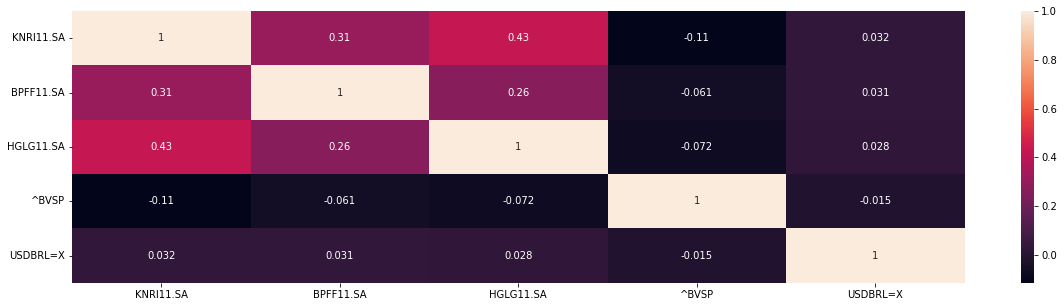

In [59]:
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

In [40]:
import plotly.graph_objs as go

In [43]:
def plot_lines(df_, columns=['Open','Close','High','Low']):
    
    fig = go.Figure()
    for c in columns:
        fig.add_trace(go.Scatter(x = list(df_.index),
                                y = df_[c],
                                mode = 'markers+lines',
                                name = c))
    return fig

In [45]:
#plot_lines(df)

In [48]:
def plotCandleStick(df, acao='ticket'):
    trace1 = {
        'x': df.index,
        'open': df.Open,
        'close': df.Close,
        'high': df.High,
        'low': df.Low,
        'type': 'candlestick',
        'name': acao,
        'showlegend': False
    }
    
    data = [trace1]
    layout = go.Layout()
    
    fig = go.Figure(data=data, layout=layout)
    return fig

In [50]:
#plotCandleStick(df)